# EWMPCA new data alpha seeking

In [1]:
first_year = 2016; last_year = 2020;

In [2]:

if (!require("quantmod")) {
    install.packages("quantmod");
    library("quantmod");
}

getSymbols(c("^GSPC", "^HSI", "^MERV", "ISIG", "AAPL"),src="yahoo");

df = cbind(
  coredata(GSPC["2008-01/2021-08"])[,4],
  coredata(HSI["2008-01/2021-08"])[,4],
  coredata(MERV["2008-01/2021-08"])[,4],
  coredata(ISIG["2008-01/2021-08"])[,4],
  coredata(AAPL["2008-01/2021-08"])[,4]
);

df = na.omit(df);
tmp = c();
for(i in 1:5) {
    tmp = cbind(tmp, diff(log(df[,i])));
}

df = as.data.frame(tmp);


Loading required package: quantmod

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Warning message:
“^HSI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning m

[1] "^GSPC" "^HSI"  "^MERV" "ISIG"  "AAPL"

Warning message in cbind(coredata(GSPC["2008-01/2021-08"])[, 4], coredata(HSI["2008-01/2021-08"])[, :
“number of rows of result is not a multiple of vector length (arg 2)”


In [3]:
df

V1,V2,V3,V4,V5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.000000000,-0.024731011,-5.438576e-04,0.000000000,0.0004619134
-0.024857970,0.023248442,-1.010878e-02,0.053680097,-0.0794059929
0.003218075,-0.012439075,-1.191698e-02,-0.006992985,-0.0134754924
-0.018522758,-0.002453010,1.754244e-02,0.020834086,-0.0366346684
0.013532110,0.018380225,-2.428651e-02,-0.143894285,0.0464935649
0.007916712,-0.014039003,-2.410098e-03,0.015748414,-0.0077220909
-0.013688651,-0.013451735,-7.775044e-04,-0.015748414,-0.0303978015
0.010811976,-0.014957731,2.346315e-02,-0.016000227,0.0346579201
-0.025240901,-0.024103665,-3.002343e-02,0.012024135,-0.0560206027


In [4]:
tail(df)

,V1,V2,V3,V4,V5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3398,0.001494619,-0.01893407,0.003746624,-0.044154329,-0.0006014232
3399,0.002217657,0.01253692,0.005972018,-0.005486982,-0.0084569537
3400,-0.005841950,0.03127123,0.005151276,0.028476500,-0.0055424814
3401,0.008769071,0.01629555,-0.008823283,0.078395939,0.0071588946
3402,0.004297324,0.01286288,-0.008537790,0.043537710,0.0299637224
3403,-0.001350027,-0.01092536,0.015835467,-0.053475680,-0.0084604080


In [5]:
Z = prcomp(df[,1:3], retx = TRUE)

In [6]:
classical_pca = Z$x;

In [7]:
head(classical_pca)

PC1,PC2,PC3
-0.0006884565,0.02467172,0.001018349
-0.0100004411,-0.02193206,-0.026419017
-0.0119830351,0.01215323,0.003570904
0.0175049716,0.00355139,-0.018716062
-0.0241527462,-0.01925903,0.012195396
-0.0024792786,0.01355120,0.008339772


In [8]:
source("xpca.R")

In [9]:
minLimit = min(dim(df)[1], 100);
cov_init = cov(df[1:minLimit,1:3]);
W_init = sorted_eig(cov_init);

[1] "eigen values:"
[1] 0.0001846042 0.0002320676 0.0007295633
[1] "eigen vectors:"
             [,1]      [,2]        [,3]
[1,] -0.006171559 0.2605906  0.96542968
[2,]  0.988016080 0.1504906 -0.03430475
[3,] -0.154227549 0.9536483 -0.25839642


In [10]:
W_init

-0.006171559,0.2605906,0.96542968
0.988016080,0.1504906,-0.03430475
-0.154227549,0.9536483,-0.25839642


In [11]:
Z2 = ewmpca2(df[,1:3], 0.9305, W_init);
ewm_pca = Z2$pca;

In [12]:
dim(ewm_pca)

[1] 3403    3

In [13]:
head(ewm_pca)

0.000000000,0.0000000000,0.0000000000
0.003407798,-0.0016105237,-0.0005823314
-0.002206378,0.0018894554,-0.0000250898
-0.001880293,0.0016614804,0.0002259261
0.002721634,-0.0018584456,0.0018808677
-0.002327495,0.0008799984,-0.0005032002


In [14]:
cross_cov = cov(cbind(classical_pca, ewm_pca));

In [15]:
cross_cov

,PC1,PC2,PC3,,,
PC1,4.336307e-03,-1.030730e-19,-8.905745e-21,1.780553e-04,-1.745312e-04,1.932285e-05
PC2,-1.030730e-19,2.430722e-04,1.148316e-21,-7.038439e-06,-5.104187e-06,-2.559389e-07
PC3,-8.905745e-21,1.148316e-21,1.750080e-04,2.679658e-06,1.812077e-06,4.735019e-07
,1.780553e-04,-7.038439e-06,2.679658e-06,2.556453e-05,-1.675298e-05,1.575750e-06
,-1.745312e-04,-5.104187e-06,1.812077e-06,-1.675298e-05,1.705295e-05,-1.575461e-06
,1.932285e-05,-2.559389e-07,4.735019e-07,1.575750e-06,-1.575461e-06,6.674468e-07


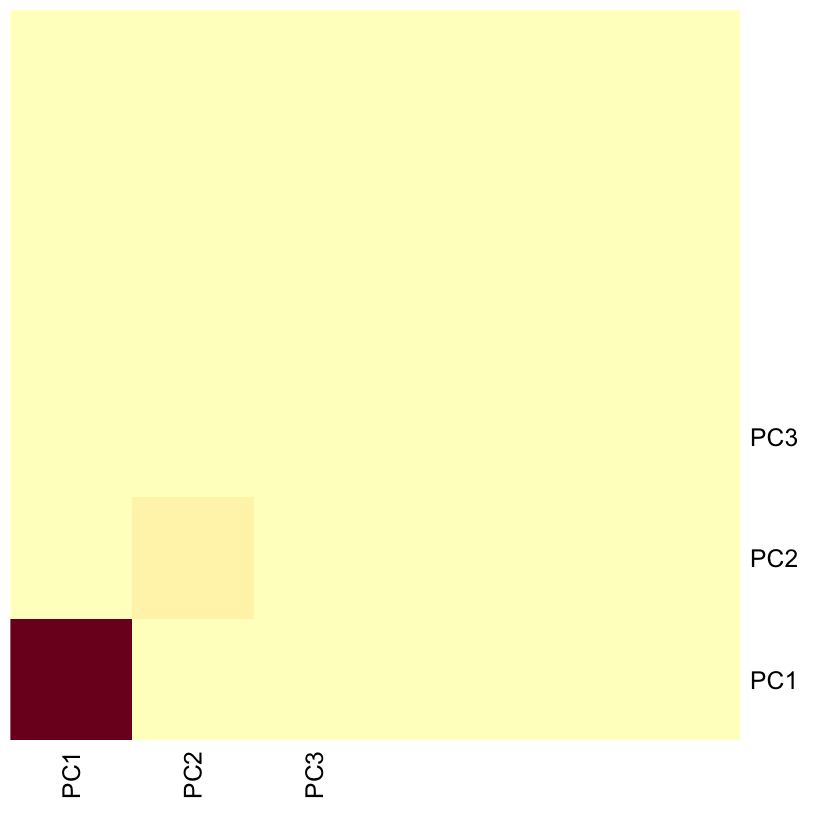

In [16]:
heatmap(cross_cov, Colv = NA, Rowv = NA, symm = TRUE)

In [17]:
cross_cov

,PC1,PC2,PC3,,,
PC1,4.336307e-03,-1.030730e-19,-8.905745e-21,1.780553e-04,-1.745312e-04,1.932285e-05
PC2,-1.030730e-19,2.430722e-04,1.148316e-21,-7.038439e-06,-5.104187e-06,-2.559389e-07
PC3,-8.905745e-21,1.148316e-21,1.750080e-04,2.679658e-06,1.812077e-06,4.735019e-07
,1.780553e-04,-7.038439e-06,2.679658e-06,2.556453e-05,-1.675298e-05,1.575750e-06
,-1.745312e-04,-5.104187e-06,1.812077e-06,-1.675298e-05,1.705295e-05,-1.575461e-06
,1.932285e-05,-2.559389e-07,4.735019e-07,1.575750e-06,-1.575461e-06,6.674468e-07


In [18]:
cross_corr = cov_to_cor(cross_cov);

In [19]:
sqrt(diag(as.matrix(cross_cov)));

PC1          PC2          PC3                                        
0.0658506382 0.0155907744 0.0132290605 0.0050561382 0.0041295222 0.0008169742

In [20]:
diag(as.matrix(cross_cov));

PC1          PC2          PC3                                        
4.336307e-03 2.430722e-04 1.750080e-04 2.556453e-05 1.705295e-05 6.674468e-07

In [21]:
dim(cross_cov)

[1] 6 6

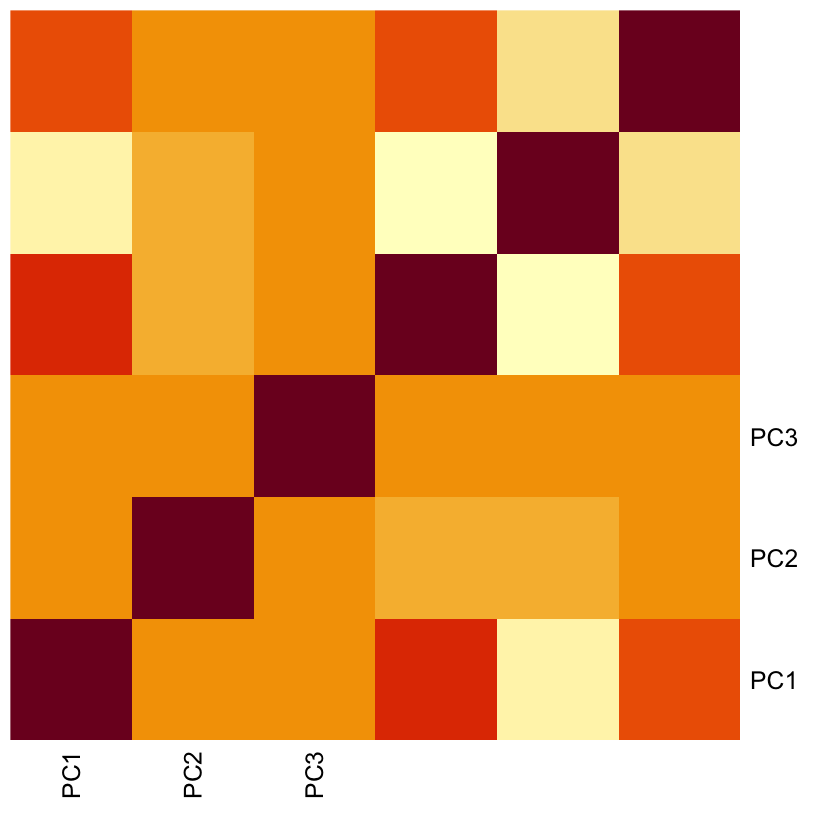

In [22]:
heatmap(cross_corr, Colv = NA, Rowv = NA, symm = TRUE)

In [23]:
ewm_pca_df = data.frame(ewm_pca)

In [24]:
names(ewm_pca_df) = c("pc1", "pc2", "pc3")

In [25]:
ewm_pca_df$ISIG = df[,4];
ewm_pca_df$AAPL = df[,5];

In [26]:
glm(ISIG ~ pc1 + pc2 + pc3, data = ewm_pca_df)


Call:  glm(formula = ISIG ~ pc1 + pc2 + pc3, data = ewm_pca_df)

Coefficients:
(Intercept)          pc1          pc2          pc3  
 -0.0002639    0.0487007    0.2613950    0.6105578  

Degrees of Freedom: 3402 Total (i.e. Null);  3399 Residual
Null Deviance:	    6.879 
Residual Deviance: 6.877 	AIC: -11450

In [27]:
glm(AAPL ~ pc1 + pc2 + pc3, data = ewm_pca_df)


Call:  glm(formula = AAPL ~ pc1 + pc2 + pc3, data = ewm_pca_df)

Coefficients:
(Intercept)          pc1          pc2          pc3  
   0.000885     0.482097     0.768265     2.238882  

Degrees of Freedom: 3402 Total (i.e. Null);  3399 Residual
Null Deviance:	    1.419 
Residual Deviance: 1.402 	AIC: -16860

In [28]:
class_pca_df = data.frame(classical_pca)

In [29]:
names(class_pca_df) = c("pc1", "pc2", "pc3")

In [30]:
class_pca_df$ISIG = df[,4];
class_pca_df$AAPL = df[,5];

In [31]:
glm(ISIG ~ pc1 + pc2 + pc3, data = class_pca_df)


Call:  glm(formula = ISIG ~ pc1 + pc2 + pc3, data = class_pca_df)

Coefficients:
(Intercept)          pc1          pc2          pc3  
 -0.0002544   -0.0054956   -0.0068000    0.3604310  

Degrees of Freedom: 3402 Total (i.e. Null);  3399 Residual
Null Deviance:	    6.879 
Residual Deviance: 6.801 	AIC: -11480

In [32]:
glm(AAPL ~ pc1 + pc2 + pc3, data = class_pca_df)


Call:  glm(formula = AAPL ~ pc1 + pc2 + pc3, data = class_pca_df)

Coefficients:
(Intercept)          pc1          pc2          pc3  
  0.0009059    0.0058188   -0.1101639    1.0347896  

Degrees of Freedom: 3402 Total (i.e. Null);  3399 Residual
Null Deviance:	    1.419 
Residual Deviance: 0.7709 	AIC: -18890

In [33]:
norm(classical_pca - ewm_pca, type = "2")

[1] 3.694951

In [34]:
max(classical_pca - ewm_pca)

[1] 0.1993848

In [35]:
max(ewm_pca)

[1] 0.1686588

In [36]:
dim(ewm_pca %*% t(Z$rotation))

[1] 3403    3

In [37]:
Z$rotation

,PC1,PC2,PC3
V1,0.001416263,-0.054746807,0.998499265
V2,0.006001752,-0.998481817,-0.054754363
V3,0.999980986,0.006070291,-0.001085536


In [38]:
dim(df)

[1] 3403    5

In [39]:
norm(as.matrix(df[,1:3]) - ewm_pca %*% t(Z2$W), type="2")

[1] 4.048279

In [41]:
norm(as.matrix(df[1:100,1:3]) - (ewm_pca %*% t(Z2$W))[1:100,], type="2")

[1] 0.2522198

In [42]:
norm(as.matrix(df[1:1000,1:3]) - (ewm_pca %*% t(Z2$W))[1:1000,], type="2")

[1] 0.7205287

In [48]:
norm(as.matrix(df[1:3000,1:3]) - (ewm_pca %*% t(Z2$W))[1:3000,], type="2")

[1] 1.324815

In [40]:
norm(as.matrix(df[,1:3]) - classical_pca %*% t(Z$rotation), type="2")

[1] 0.01965309